in this notebook, a series of check is applied to our dataset. 

including:
- plotting country over time
- plotting distribution
- spliting and sampling for mean and variance
- dicky-fuller test for stationary 
- heatmap for correlation matrix
- plotting lagging term

In [7]:
import pandas as pd
from auxiliary import *
import zipfile
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score

%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [8]:
#both wide and long format is used in this analysis
wide = pd.read_csv('data/result.csv')
wide.head()

0              25.0              25.0              25.0   
1              50.0              50.0              50.0              50.0   
2              68.8              68.8              62.5              62.5   
3              87.5              87.5              87.5              87.5   
4              68.8              68.8              68.8              68.8   

   demo_electoral2006  demo_electoral2008  demo_electoral2010  \
0                61.7                51.7                25.0   
1                22.5                26.7                21.7   
2                87.5                87.5                87.5   
3               100.0               100.0               100.0   
4                95.8                95.8                95.8   

   demo_electoral2011  demo_electoral2012  demo_electoral2013  \
0                25.0                25.0                25.0   
1                21.7                30.0                30.0   
2                87.5                87.5                87.5   
3               100.0               100.0                95.8   
4                95.8                95.8                95.8   

   demo_electoral2014  demo_electoral2015  demo_electoral2016  \
0                25.0                25.0                25.0   
1                30.0                30.0                25.8   
2                87.5                91.7                91.7   
3                95.8                95.8                95.8   
4                95.8                95.8                95.8   

   demo_electoral2017  demo_electoral2018  demo_electoral2019  demo_gov2006  \
0                25.0                29.2                34.2           0.0   
1                25.8                25.8                30.8          22.1   
2                91.7                91.7                91.7          50.0   
3               100.0               100.0               100.0          89.3   
4                95.8                95.8                95.8          82.1   

   demo_gov2008  demo_gov2010  demo_gov2011  demo_gov2012  demo_gov2013  \
0           7.9           7.9           7.9           7.9           7.9   
1          22.1          22.1          22.1          22.1          22.1   
2          50.0          57.1          57.1          57.1          57.1   
3          89.3          89.3          89.3          89.3          89.3   
4          78.6          78.6          78.6          82.1          75.0   

   demo_gov2014  demo_gov2015  demo_gov2016  demo_gov2017  demo_gov2018  \
0          11.4          11.4          11.4          11.4          11.4   
1          22.1          22.1          22.1          22.1          22.1   
2          57.1          50.0          50.0          50.0          53.6   
3          89.3          89.3          89.3          89.3          89.3   
4          78.6          78.6          78.6          82.1          78.6   

   demo_gov2019  demo_liberty2006  demo_liberty2008  demo_liberty2010  \
0           6.4              44.1              44.1              38.2   
1          28.6              35.3              44.1              44.1   
2          53.6              82.4              82.4              79.4   
3          89.3             100.0             100.0             100.0   
4          78.6              91.2              91.2              91.2   

   demo_liberty2011  demo_liberty2012  demo_liberty2013  demo_liberty2014  \
0              38.2              38.2              38.2              38.2   
1              44.1              44.1              44.1              44.1   
2              79.4              79.4              79.4              79.4   
3             100.0             100.0             100.0             100.0   
4              91.2              94.1              94.1              94.1   

   demo_liberty2015  demo_liberty2016  demo_liberty2017  demo_liberty2018  \
0              38.2              38.2              38.2              38.2   
1              44.1       

In [9]:
year_vary = ["demo", "funding", "pledge", "gdp", "funding_gdp", "gdpcapita", "govexpense", "pop", "oda", "gni", "demo_electoral", 'demo_gov', 'demo_participate', 'demo_culture','demo_liberty']
long = pd.wide_to_long(wide, year_vary, i="isocode", j="year")
long.head()

trust  patience  oda_int  aid  altruism      country  \
isocode year                                                            
AFG     2003  0.315964  -0.20136        0    0  0.166455  Afghanistan   
        2004  0.315964  -0.20136        0    0  0.166455  Afghanistan   
        2005  0.315964  -0.20136        0    0  0.166455  Afghanistan   
        2006  0.315964  -0.20136        0    0  0.166455  Afghanistan   
        2007  0.315964  -0.20136        0    0  0.166455  Afghanistan   

                  region  posrecip  risktaking  g20 income_type  negrecip  \
isocode year                                                                
AFG     2003  South Asia  0.289641    0.120764    0  Low income  0.254712   
        2004  South Asia  0.289641    0.120764    0  Low income  0.254712   
        2005  South Asia  0.289641    0.120764    0  Low income  0.254712   
        2006  South Asia  0.289641    0.120764    0  Low income  0.254712   
        2007  South Asia  0.289641    0.120764    0  Low income  0.254712   

              oecd  demo   funding  pledge           gdp  funding_gdp  \
isocode year                                                            
AFG     2003     0   NaN       NaN     NaN  4.515559e+09          NaN   
        2004     0   NaN       NaN     NaN  5.226779e+09          NaN   
        2005     0   NaN  500000.0     NaN  6.209138e+09       0.0081   
        2006     0  30.6       NaN     NaN  6.971286e+09          NaN   
        2007     0   NaN       NaN     NaN  9.747880e+09          NaN   

               gdpcapita  govexpense         pop  oda  gni  demo_electoral  \
isocode year                                                                 
AFG     2003  190.683814      11.927  23680871.0  NaN  NaN             NaN   
        2004  211.382117      15.069  24726684.0  NaN  NaN             NaN   
        2005  242.031285      15.698  25654277.0  NaN  NaN             NaN   
        2006  263.733692      18.303  26433049.0  NaN  NaN            61.7   
        2007  359.693238      21.478  27100536.0  NaN  NaN             NaN   

              demo_gov  demo_participate  demo_culture  demo_liberty  
isocode year                                                          
AFG     2003       NaN               NaN           NaN           NaN  
        2004       NaN               NaN           NaN           NaN  
        2005       NaN               NaN           NaN           NaN  
        2006       0.0              22.2          25.0          44.1  
        2007       NaN               NaN           NaN           NaN

# draw yearly varied variable by country over years to see whether there is a trend exist 

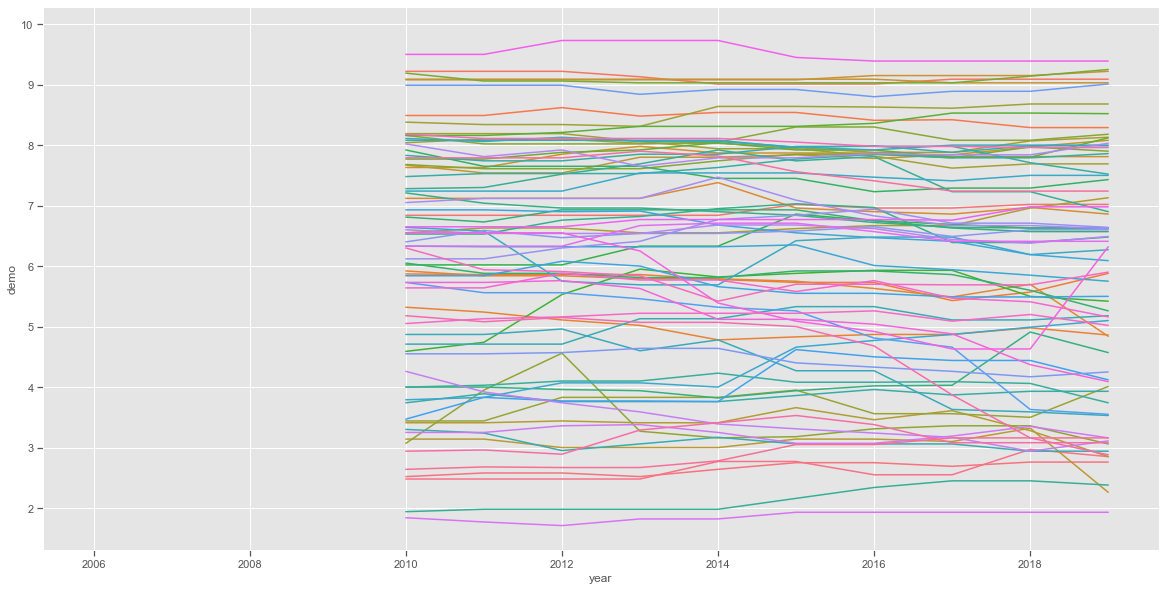

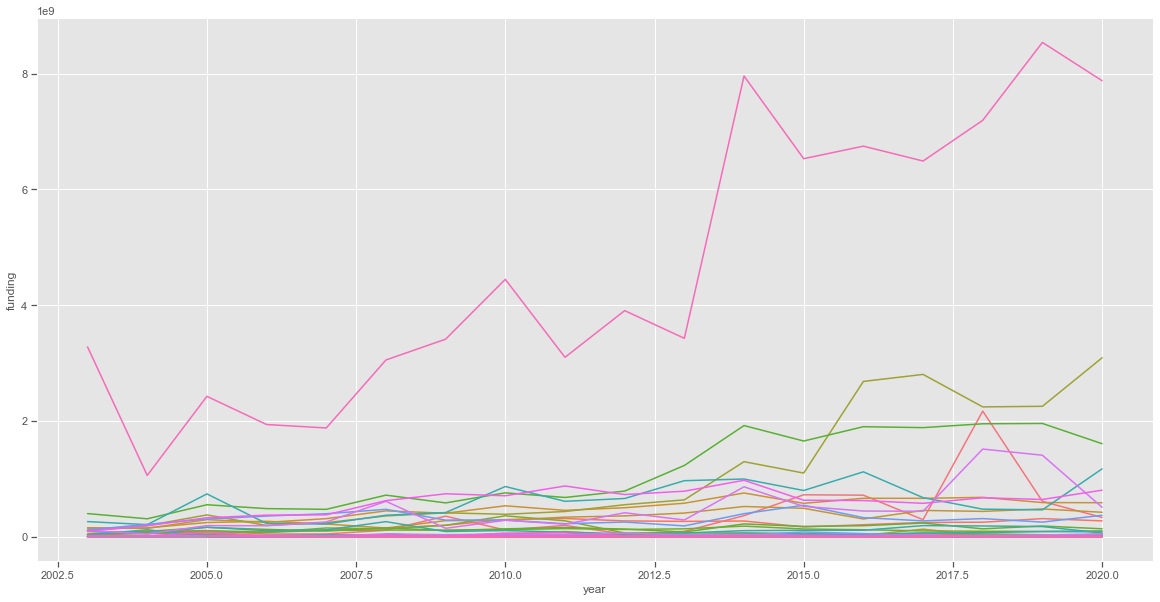

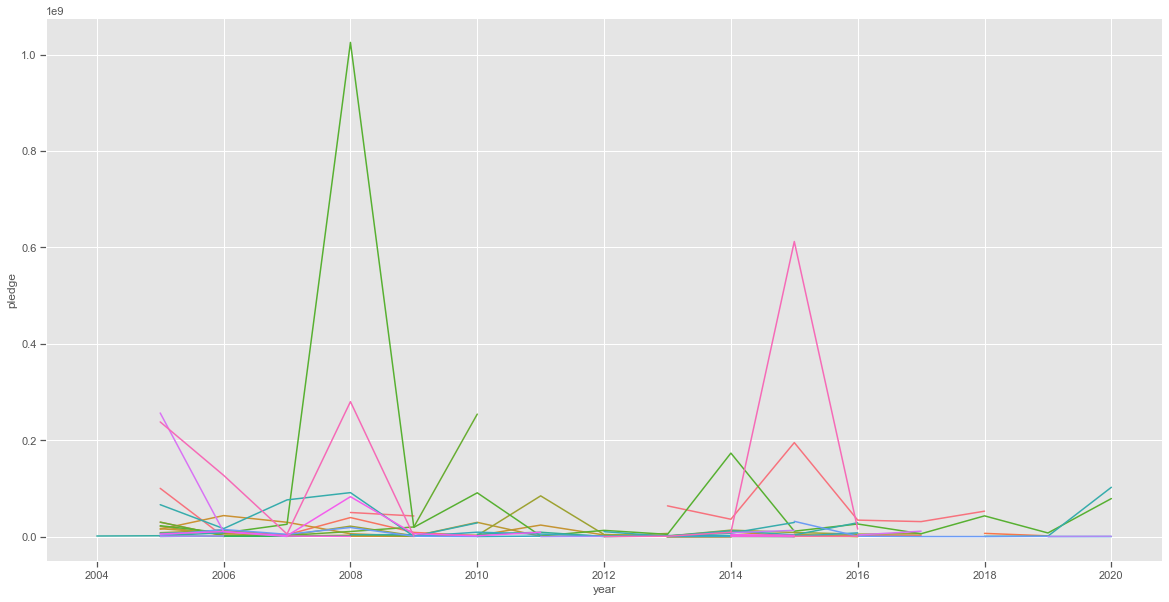

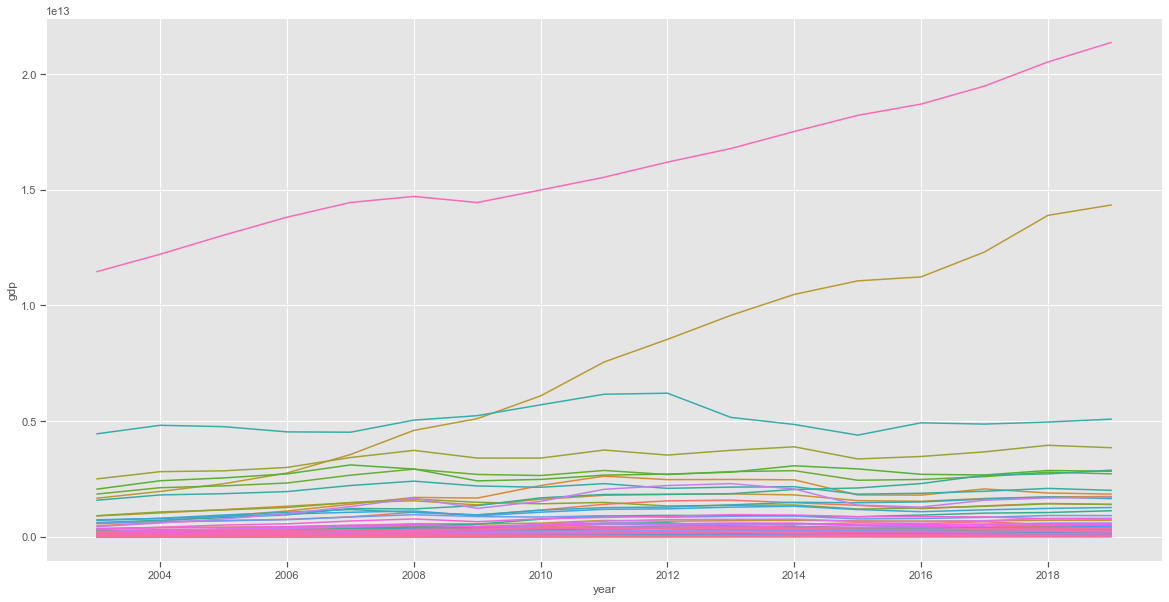

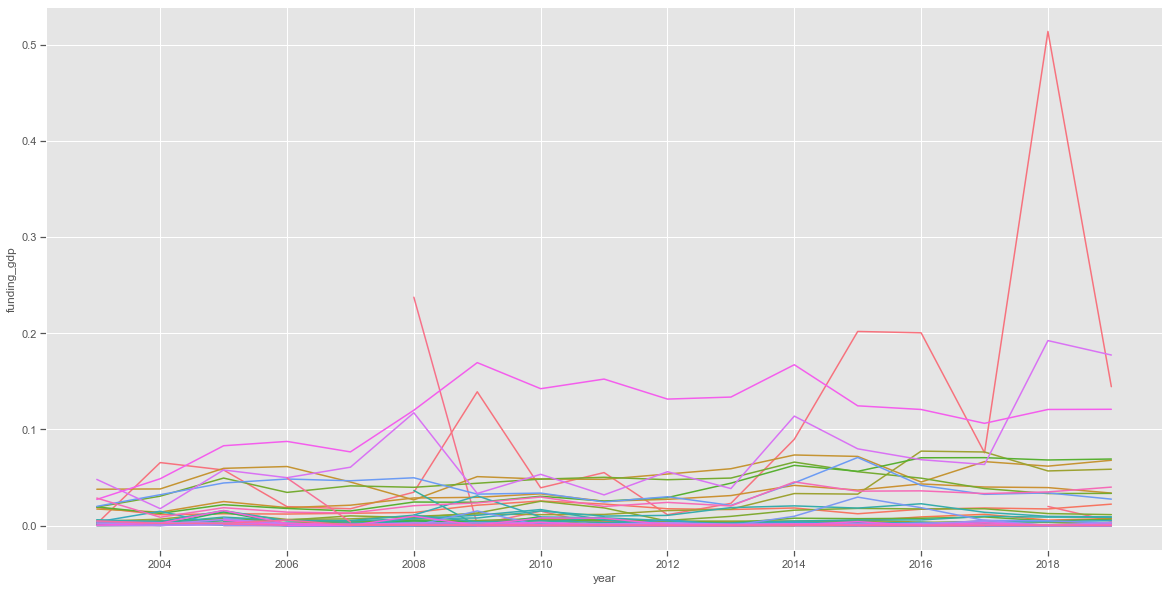

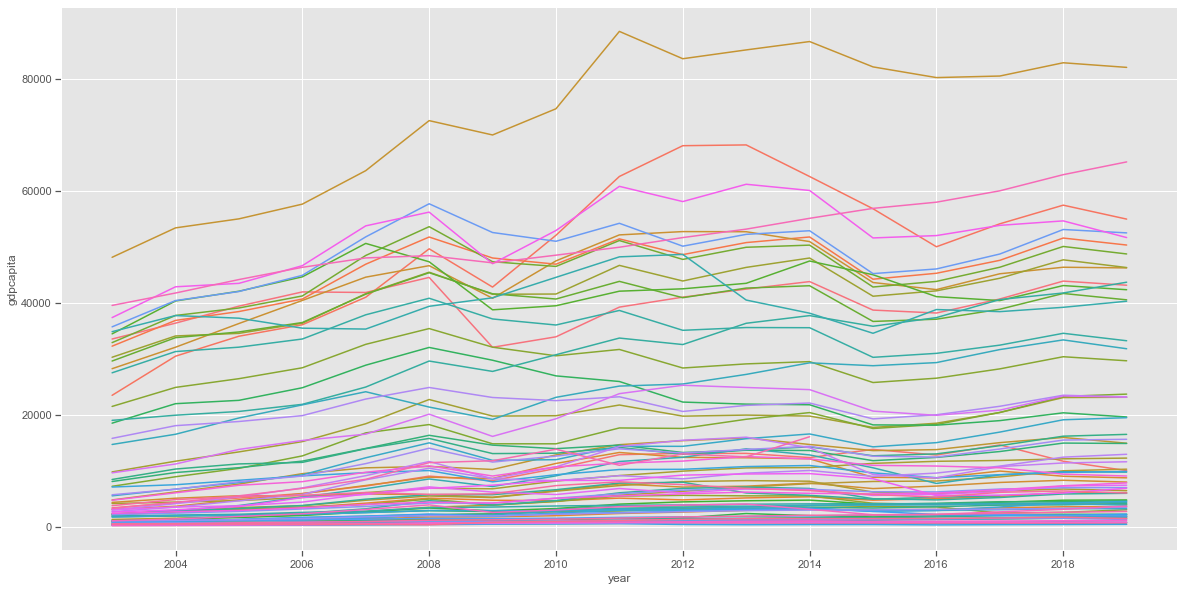

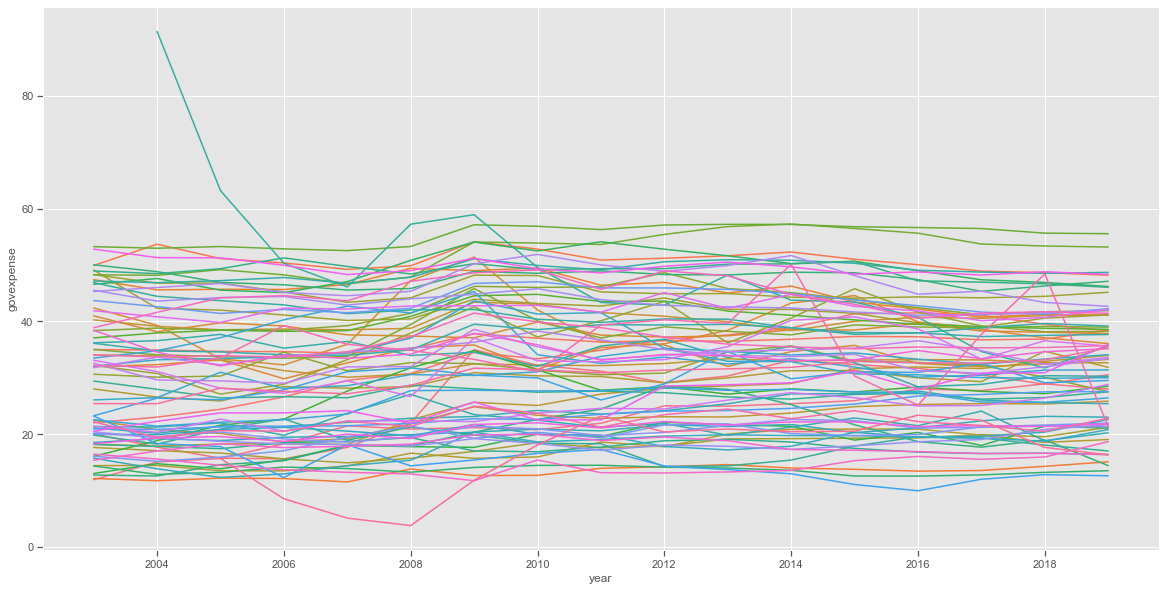

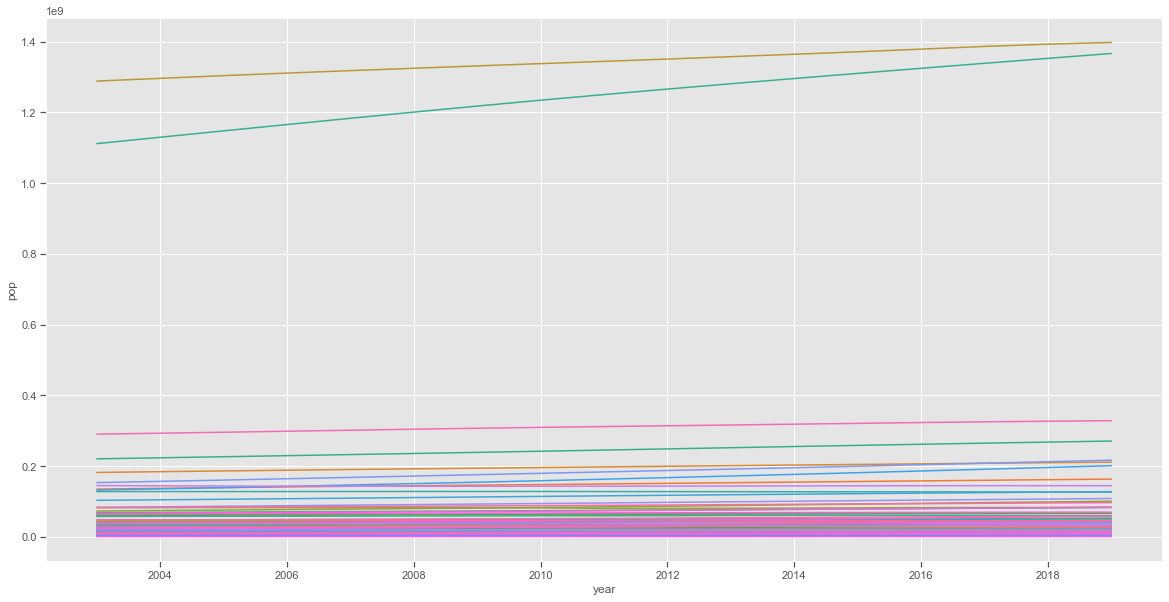

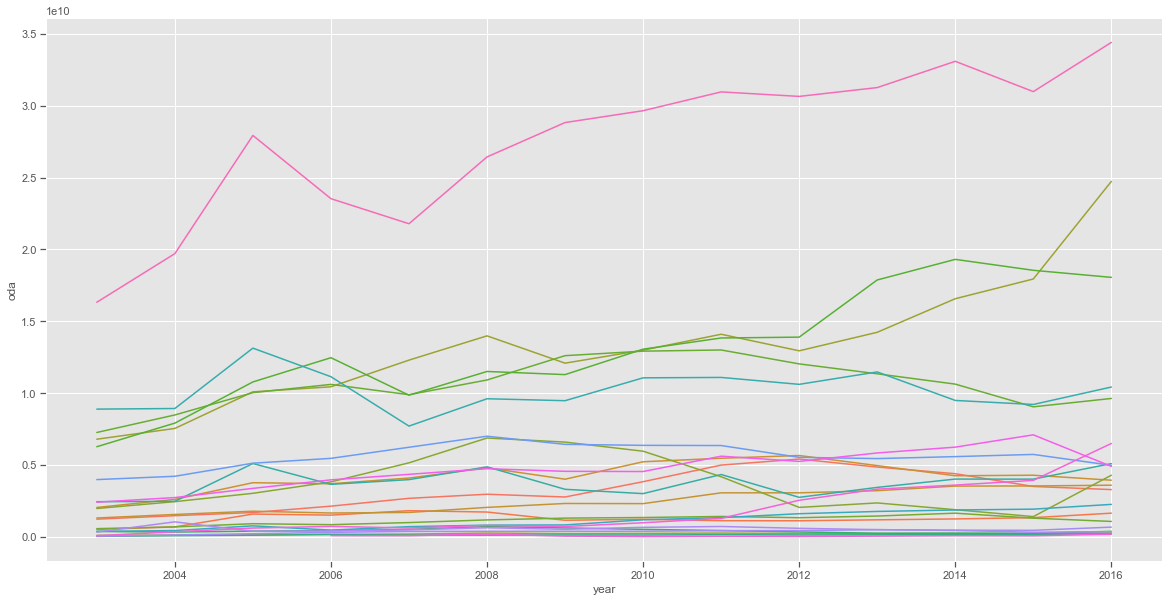

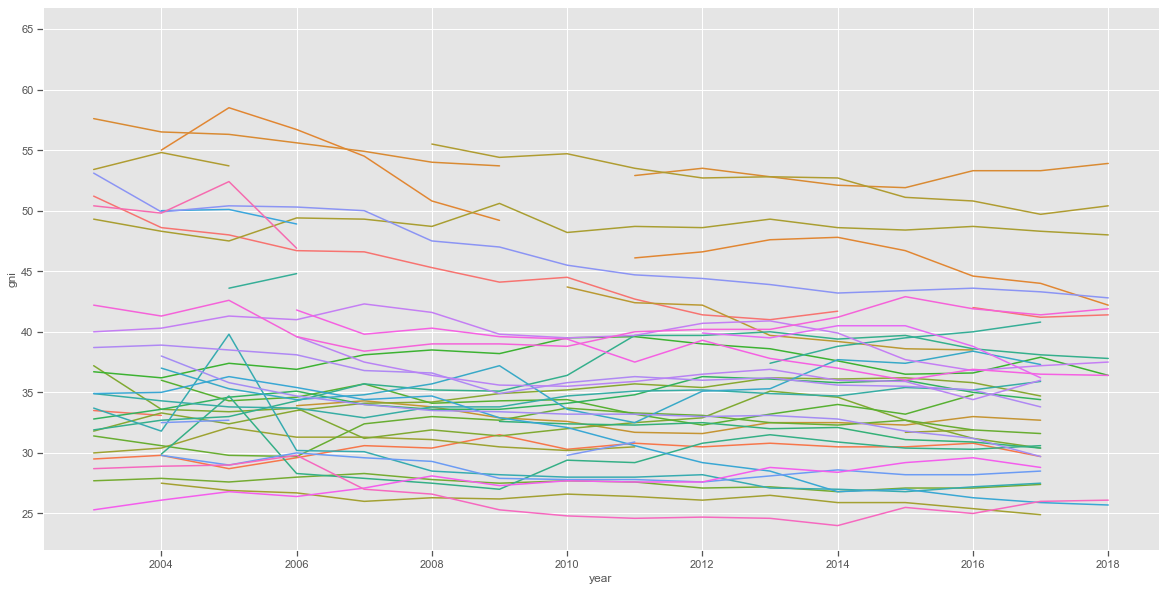

In [4]:
for i in year_vary:
    plt.figure()
    sns.lineplot(x="year", y= i, hue="country",  data=long, legend=False)


# plot distribution of yearly varied variable to see whether it is skewed
### notice part of our variables violate normality

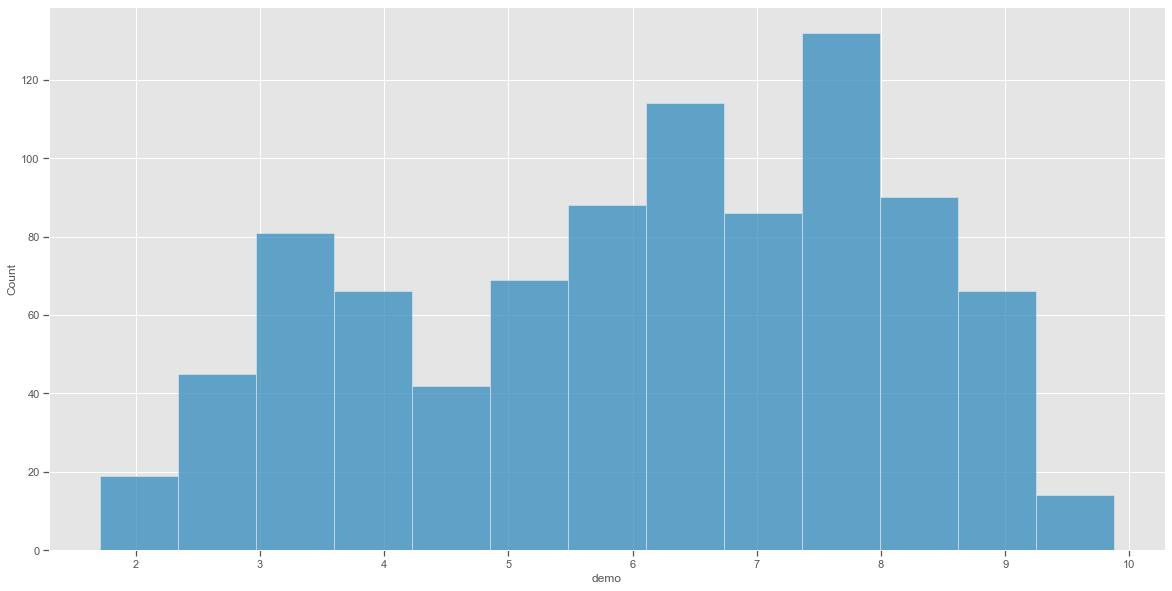

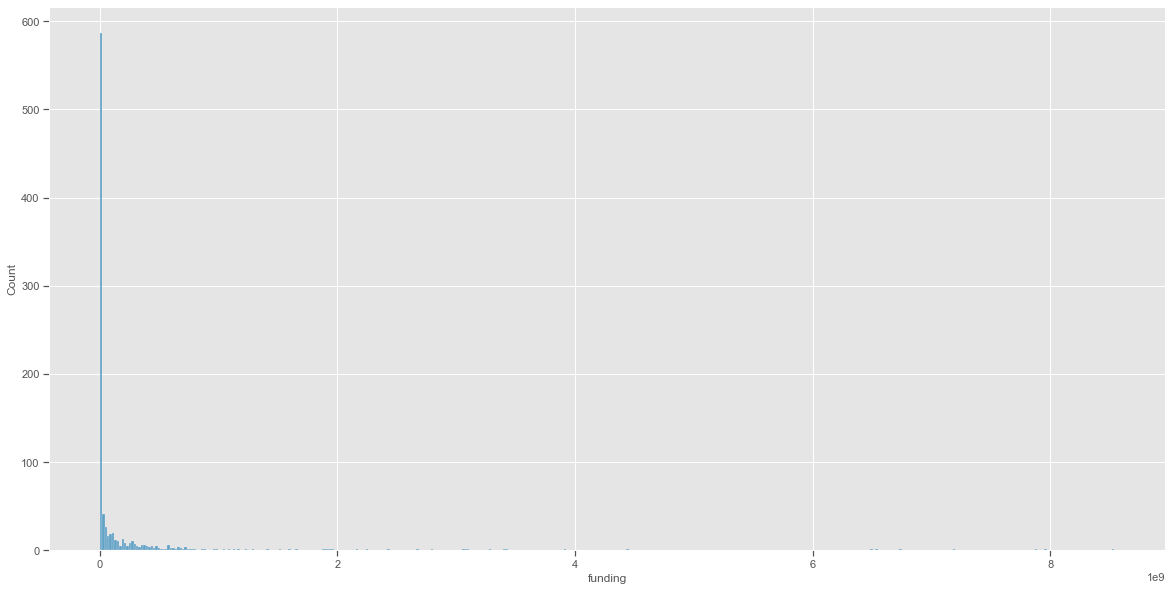

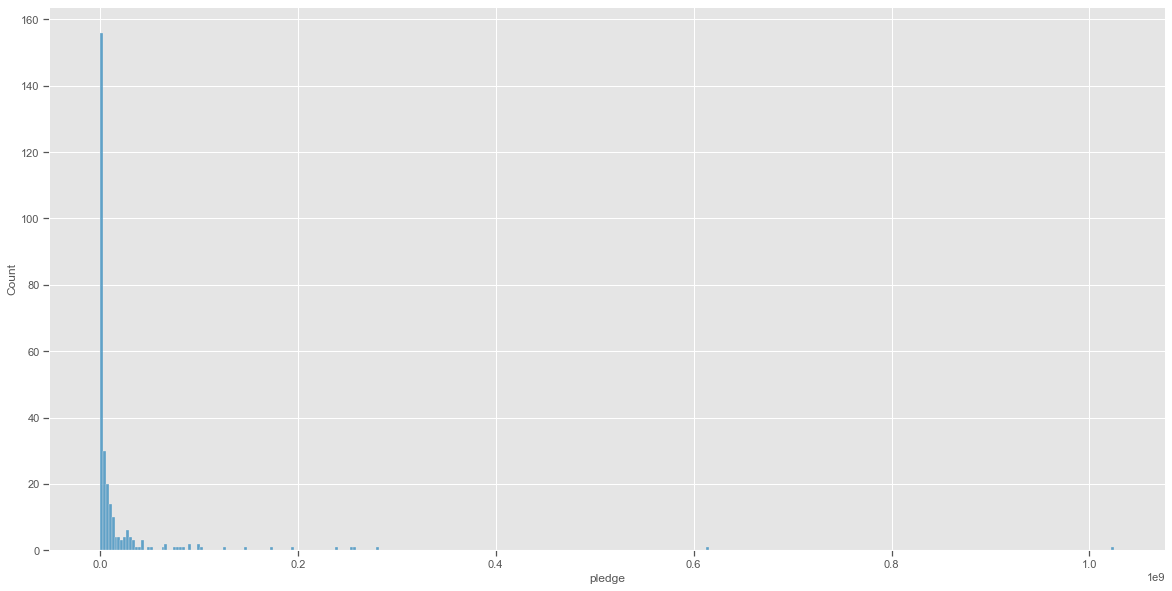

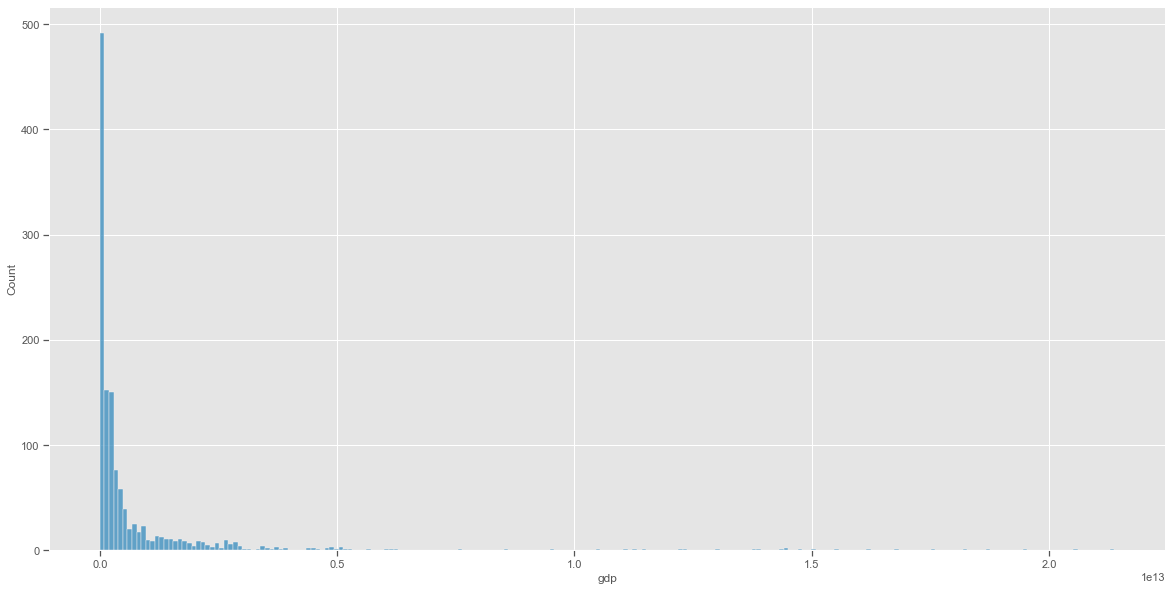

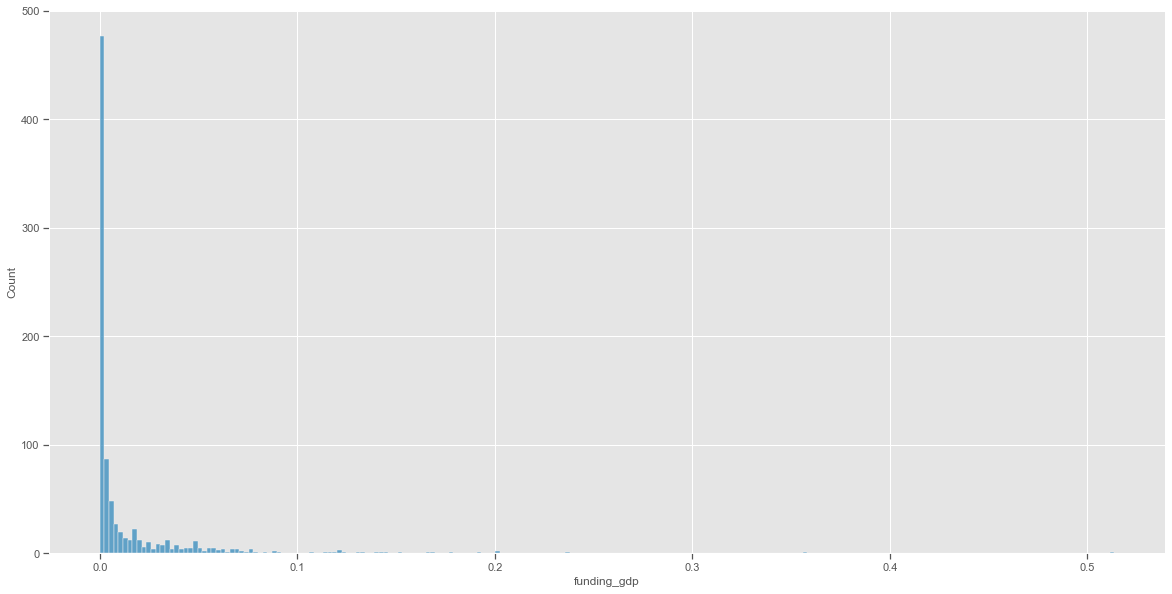

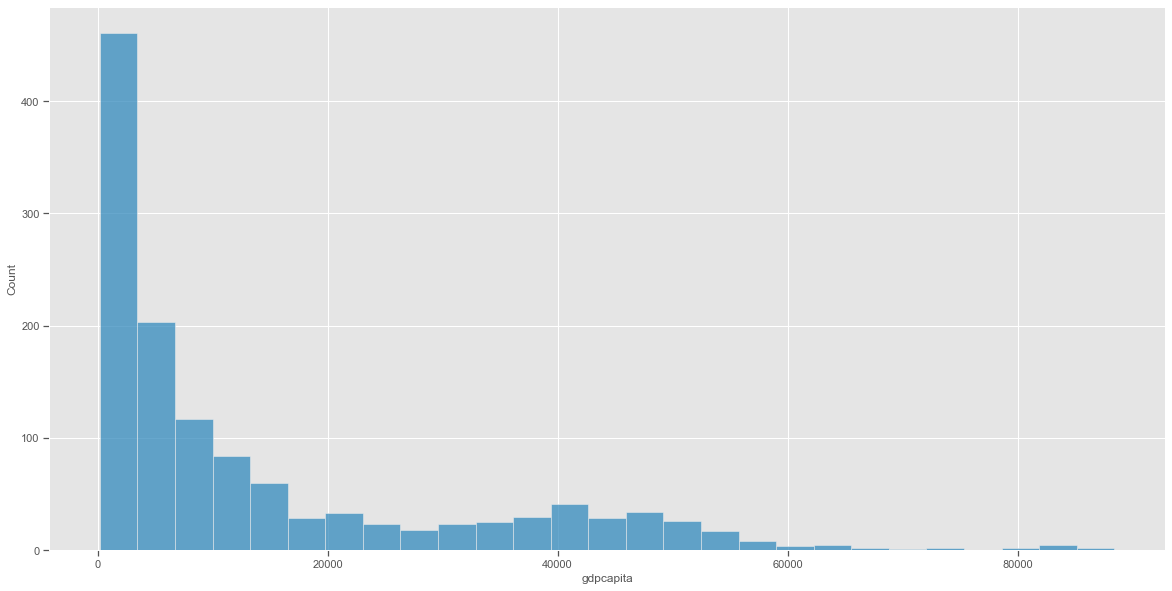

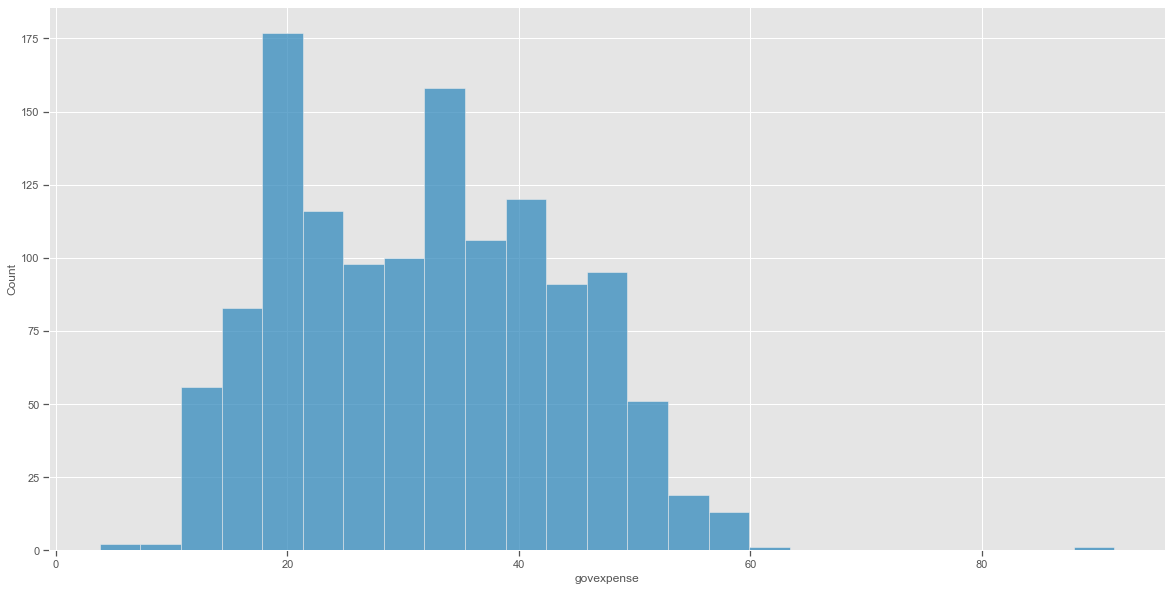

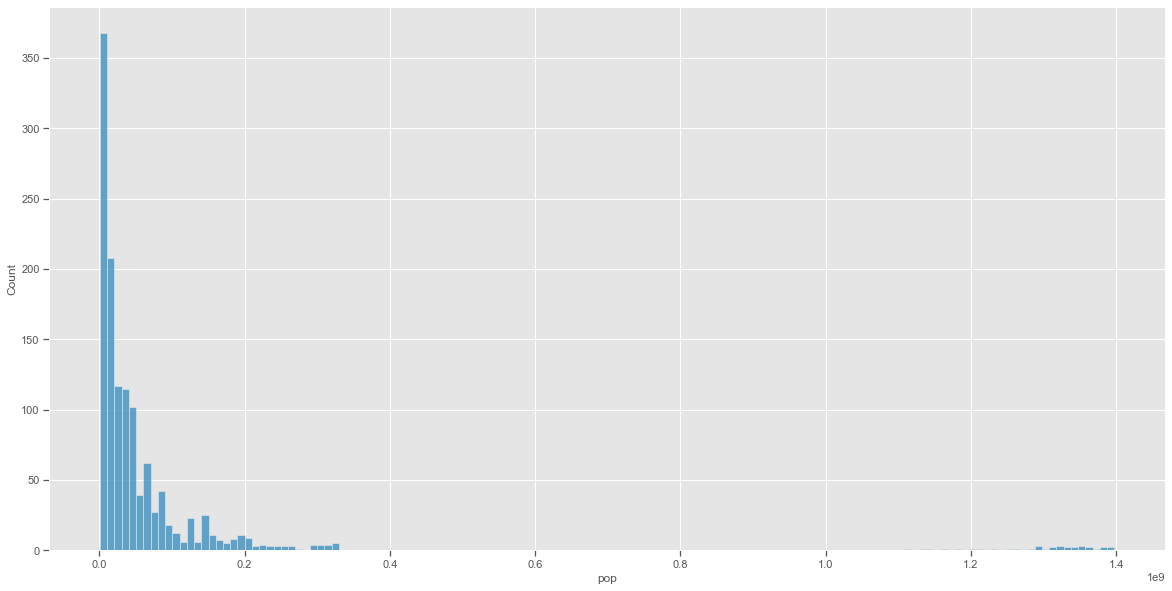

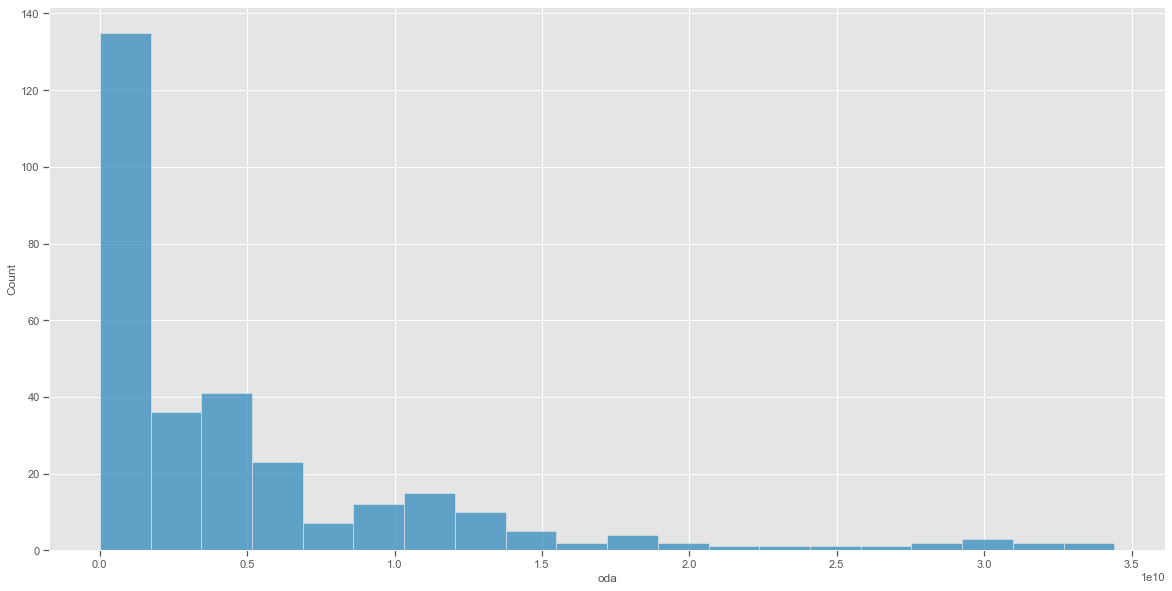

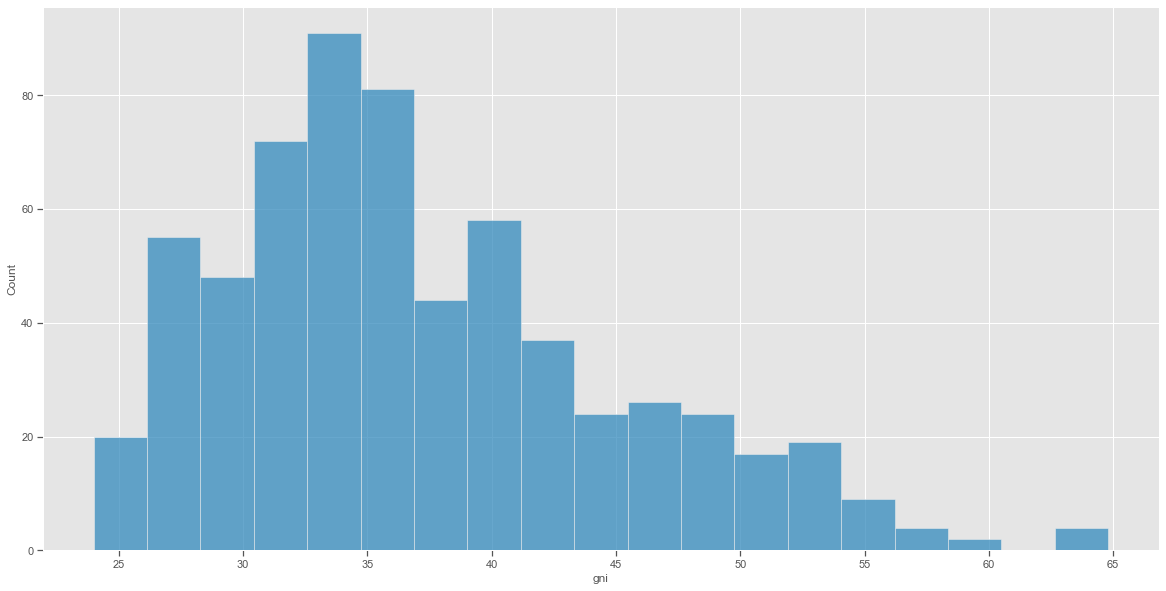

In [5]:
for i in year_vary:
    # long_dropna = long.dropna(subset=[i])
    plt.figure()
    sns.histplot(data=long, x=i)



# split data into 3 groups and examine sample mean and variance

In [6]:
for i in year_vary:
    sample3(i, long)

demo
[6.06 6.09 6.18]
[3.95 3.95 3.99]
funding
[1.52469888e+08 2.62039421e+08 1.78155784e+08]
[2.52735656e+17 9.71136041e+17 2.06206788e+17]
pledge
[19743055.94 26887569.32 10932891.42]
[5.80392120e+15 9.50510556e+15 5.96515450e+14]
gdp
[7.91381551e+11 9.33603854e+11 6.11974249e+11]
[4.71823082e+24 6.57145592e+24 1.49261584e+24]
funding_gdp
[0.01 0.01 0.02]
[0. 0. 0.]
gdpcapita
[13670.71 15269.68 13412.16]
[2.77721456e+08 3.22775341e+08 2.87554381e+08]
govexpense
[31.91 31.79 31.83]
[146.52 127.52 143.73]
pop
[92455213.33 73426790.75 79727365.37]
[5.77356184e+16 3.69213308e+16 4.24991288e+16]
oda
[5.11992238e+09 4.31933447e+09 6.33026823e+09]
[4.08512587e+19 3.85678605e+19 6.07907868e+19]
gni
[36.81 37.62 36.76]
[59.9  62.88 60.24]


# augmented Dickey-Fuller test for stationary

In [7]:
for i in year_vary:
    adf_test = adfuller(long[i].dropna())
    if adf_test[1] > 0.01:
        print(f'{i} cannot reject H0:data is non-stationary')


oda cannot reject H0:data is non-stationary


# heatmap to see correlation between years

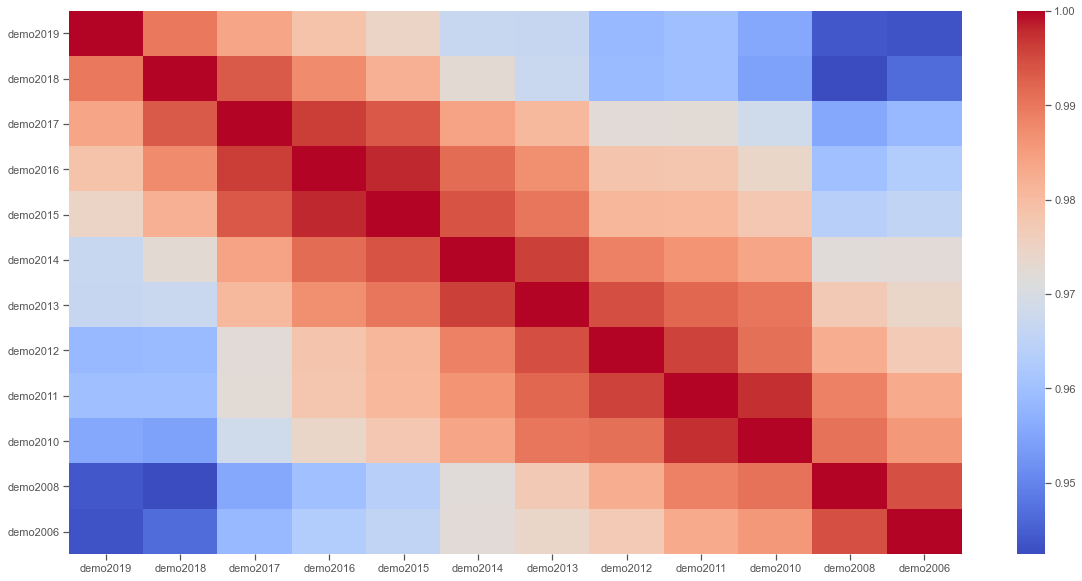

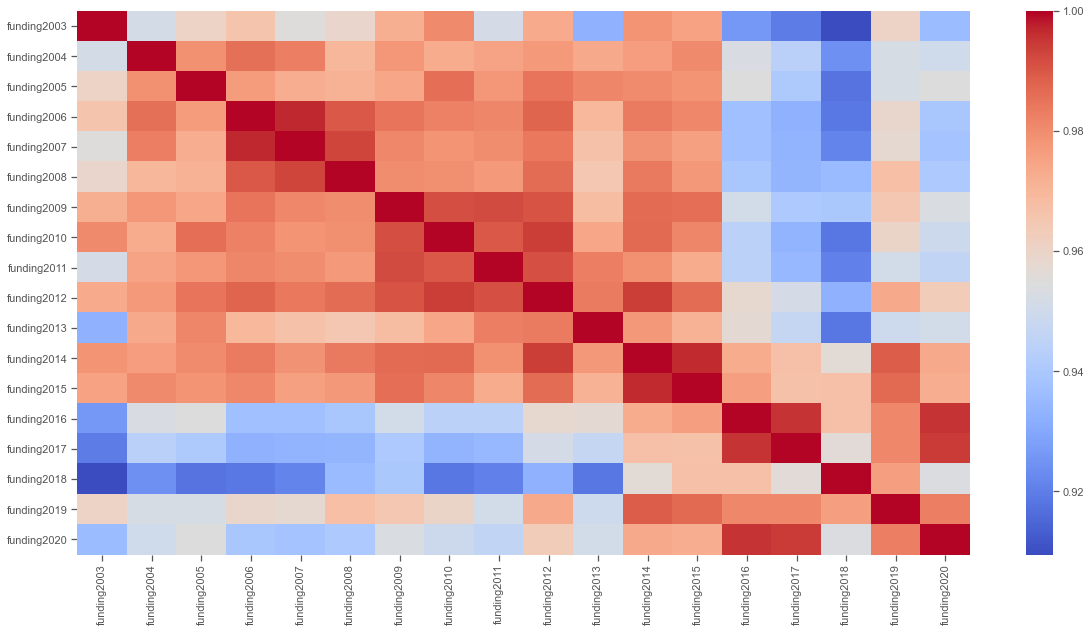

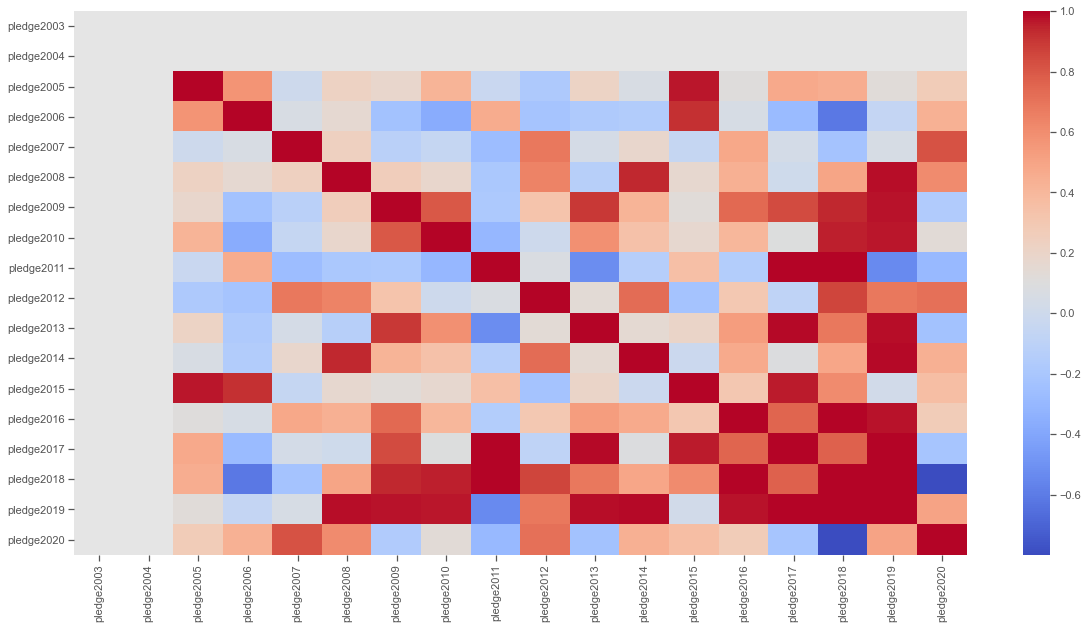

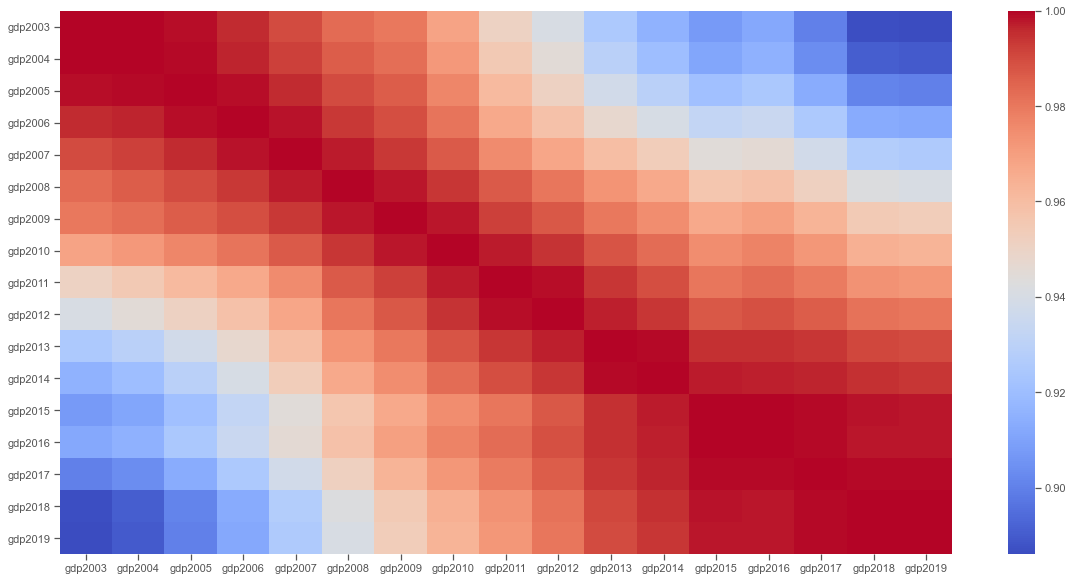

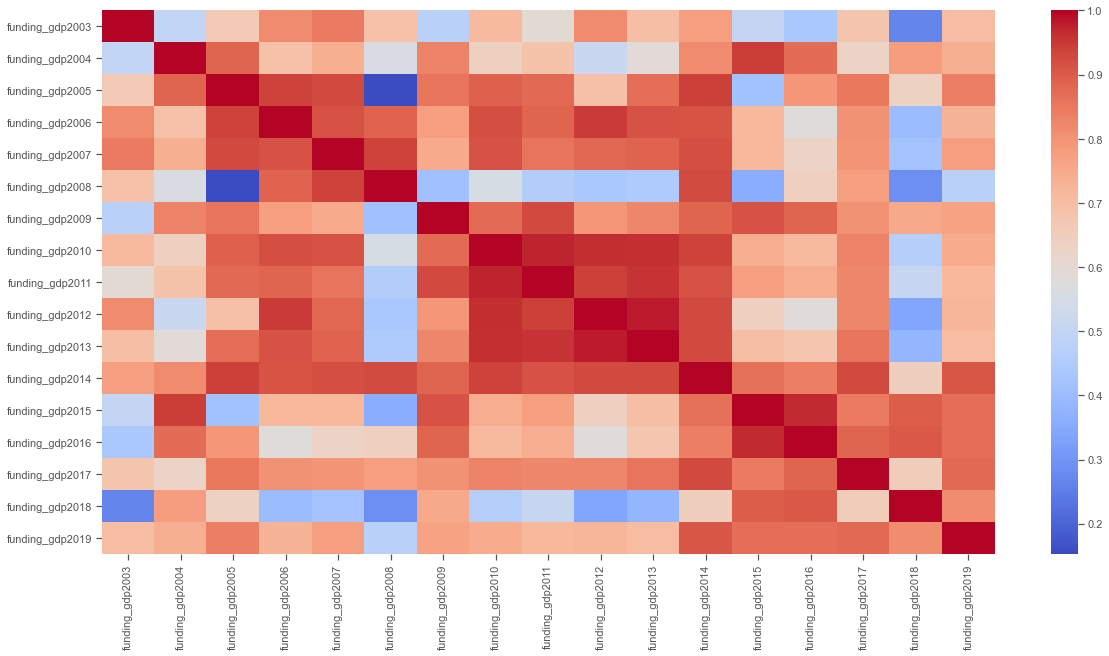

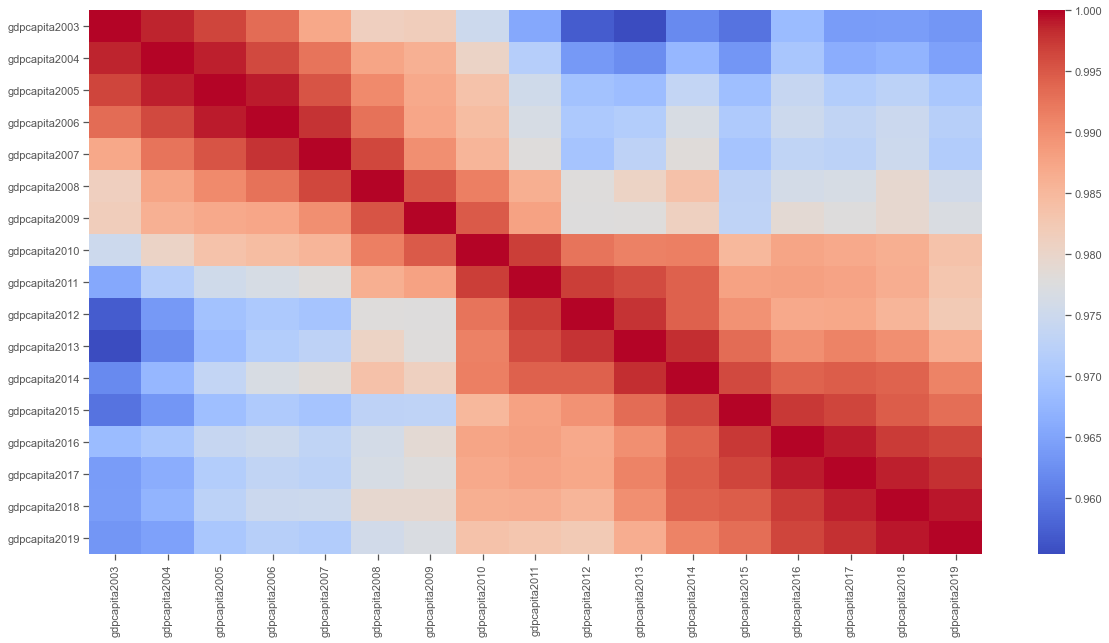

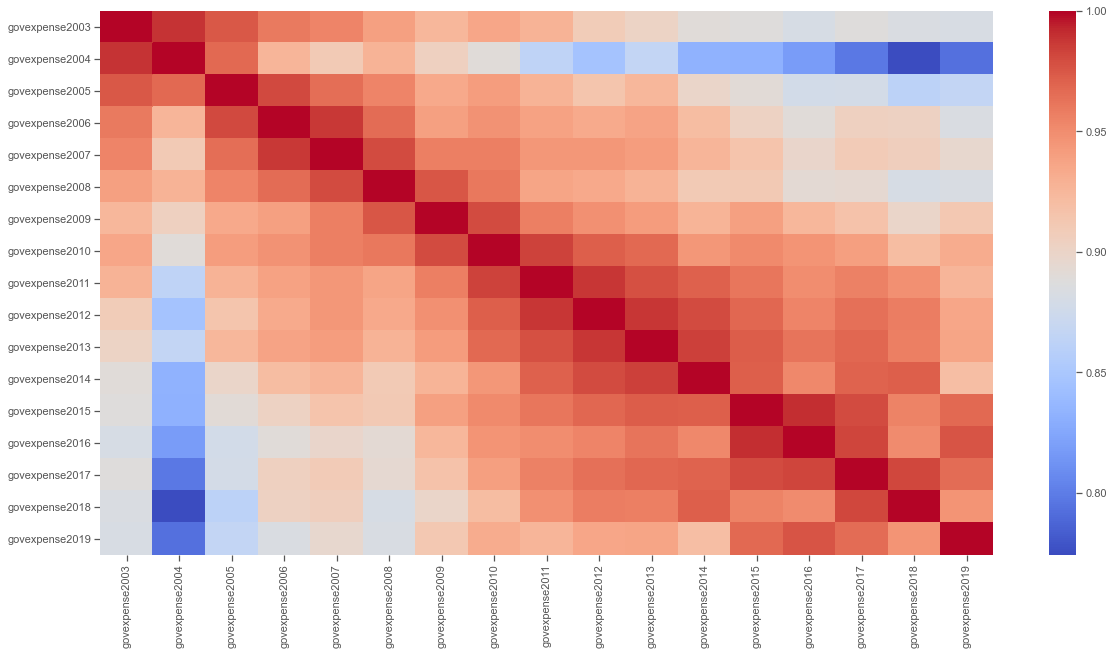

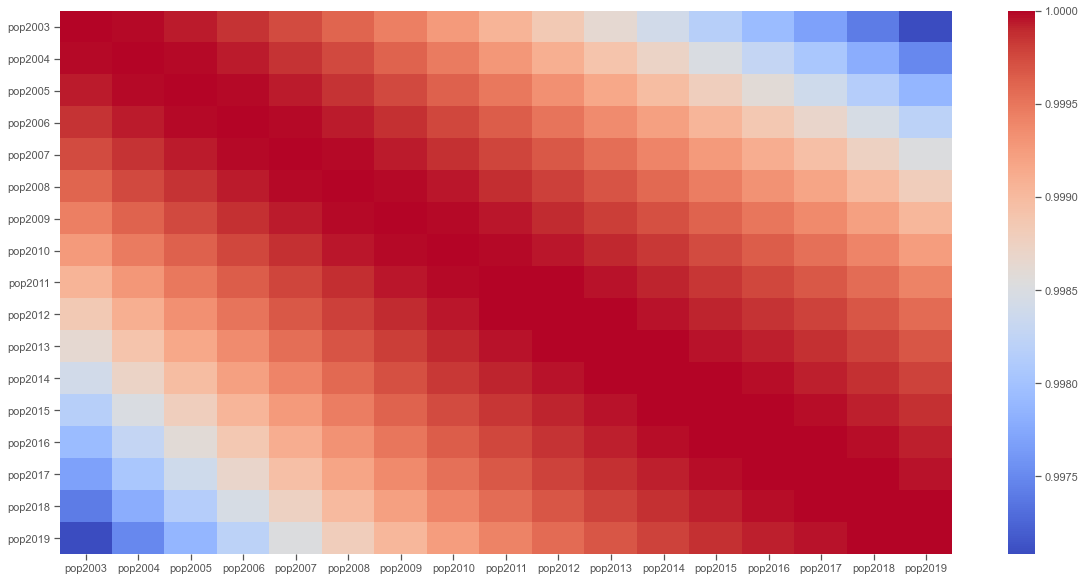

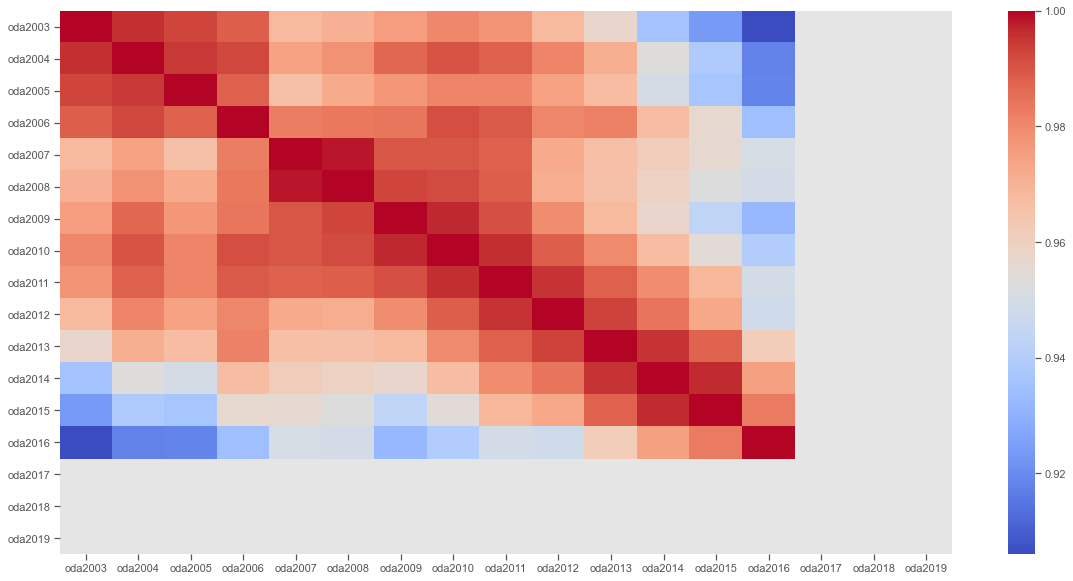

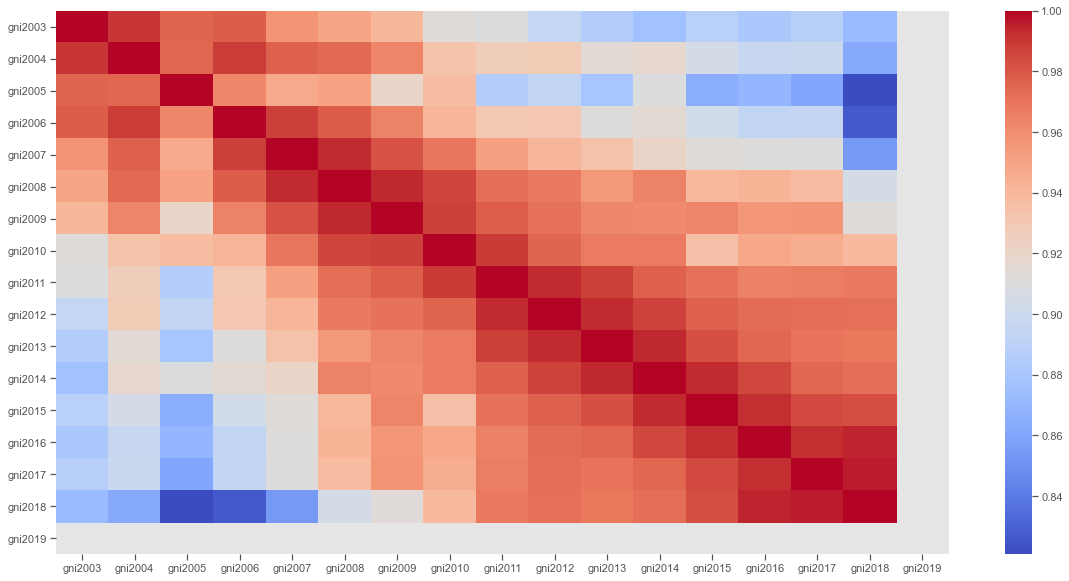

In [8]:
for i in range(len(year_vary)):
    plt.figure()
    df_scale_filter = wide.filter(regex=f'^{year_vary[i]}[0-9]+$')
    sns.heatmap(df_scale_filter.corr(), cmap="coolwarm")

  

In [9]:
long.reset_index().head()

isocode  year     trust  altruism  oecd      country      region  g20  \
0     AFG  2003  0.315964  0.166455     0  Afghanistan  South Asia    0   
1     AFG  2004  0.315964  0.166455     0  Afghanistan  South Asia    0   
2     AFG  2005  0.315964  0.166455     0  Afghanistan  South Asia    0   
3     AFG  2006  0.315964  0.166455     0  Afghanistan  South Asia    0   
4     AFG  2007  0.315964  0.166455     0  Afghanistan  South Asia    0   

  income_type  patience  ...  demo   funding  pledge           gdp  \
0  Low income  -0.20136  ...   NaN       NaN     NaN  4.515559e+09   
1  Low income  -0.20136  ...   NaN       NaN     NaN  5.226779e+09   
2  Low income  -0.20136  ...   NaN  500000.0     NaN  6.209138e+09   
3  Low income  -0.20136  ...  3.06       NaN     NaN  6.971286e+09   
4  Low income  -0.20136  ...   NaN       NaN     NaN  9.747880e+09   

   funding_gdp   gdpcapita  govexpense         pop  oda  gni  
0          NaN  190.683814      11.927  23680871.0  NaN  NaN  
1          NaN  211.382117      15.069  24726684.0  NaN  NaN  
2       0.0081  242.031285      15.698  25654277.0  NaN  NaN  
3          NaN  263.733692      18.303  26433049.0  NaN  NaN  
4          NaN  359.693238      21.478  27100536.0  NaN  NaN  

[5 rows x 25 columns]

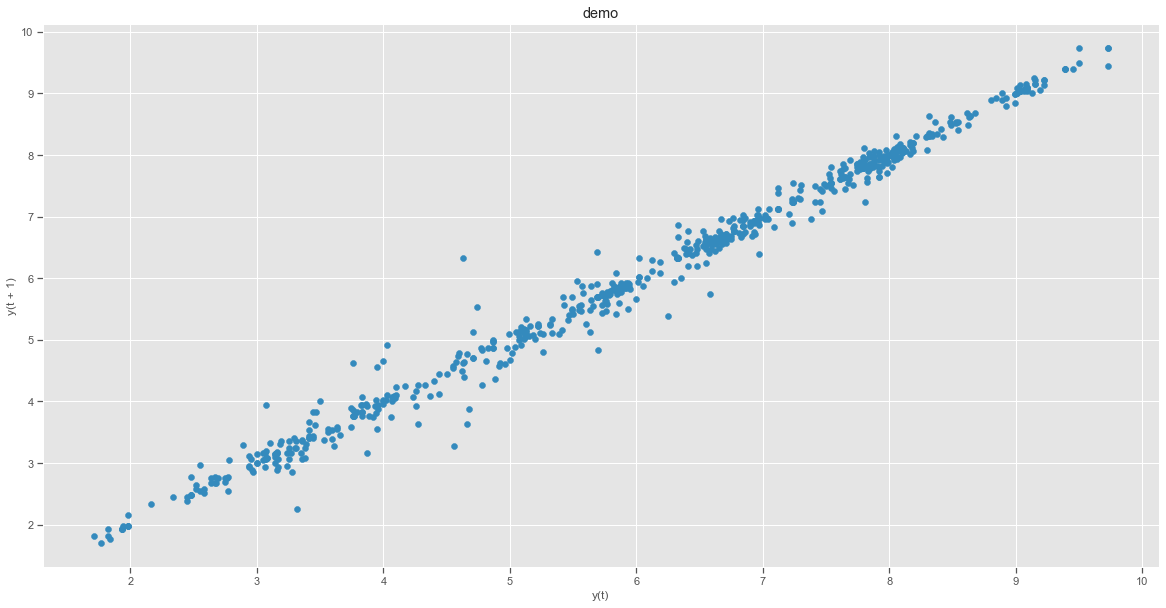

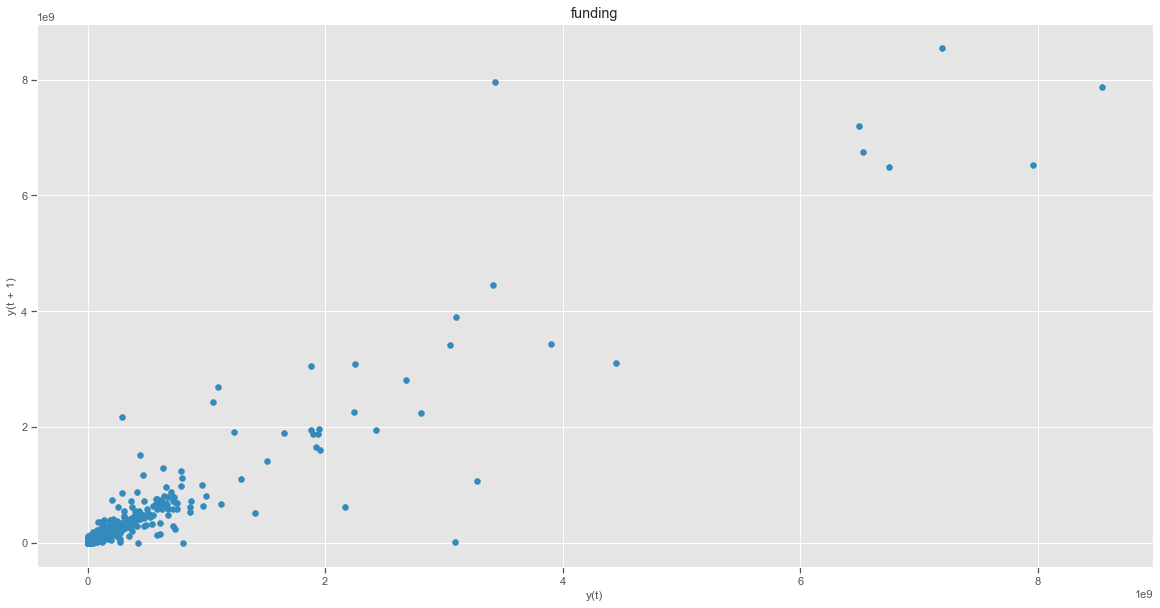

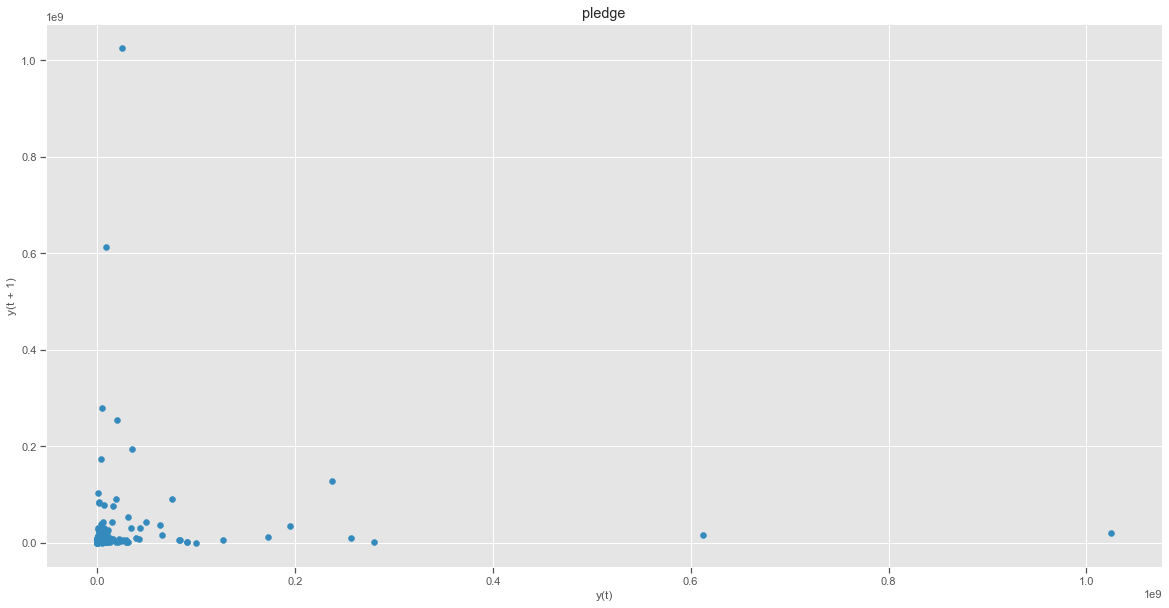

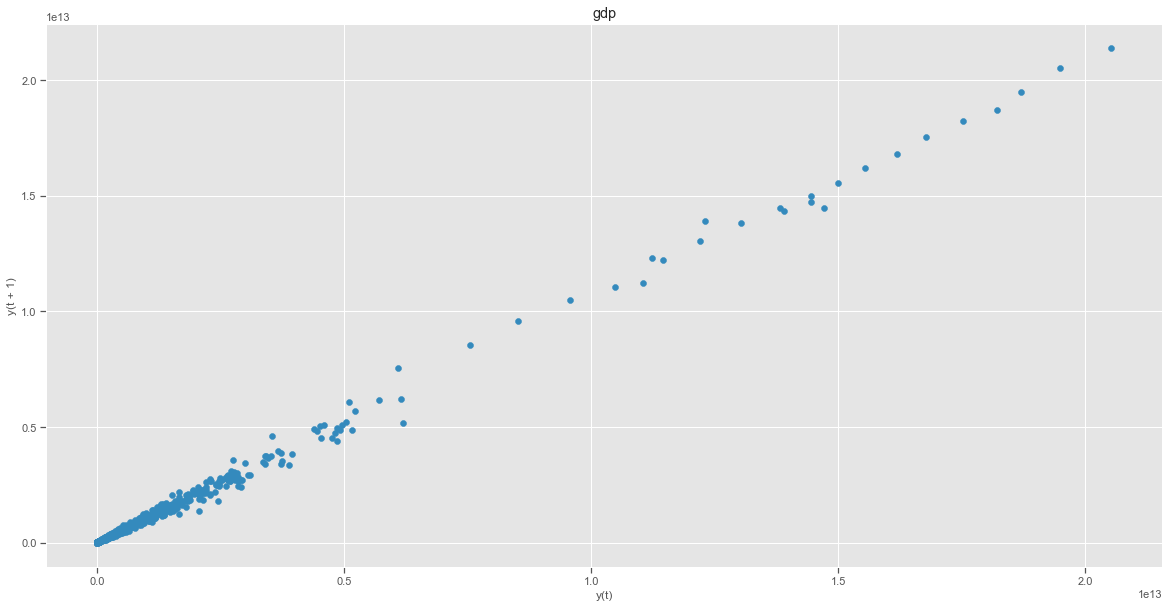

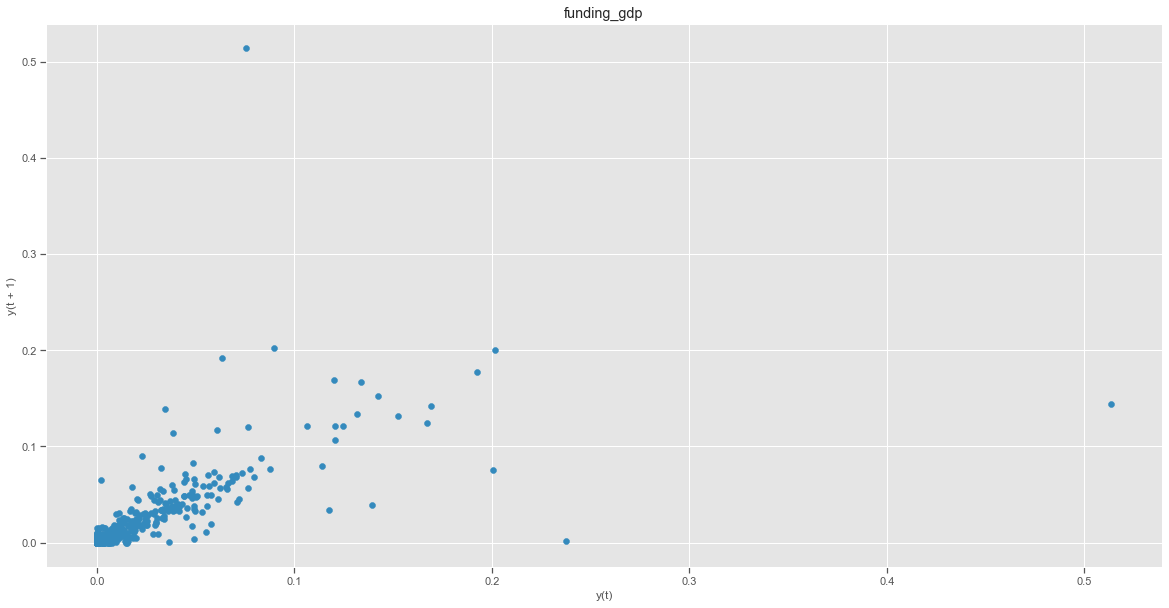

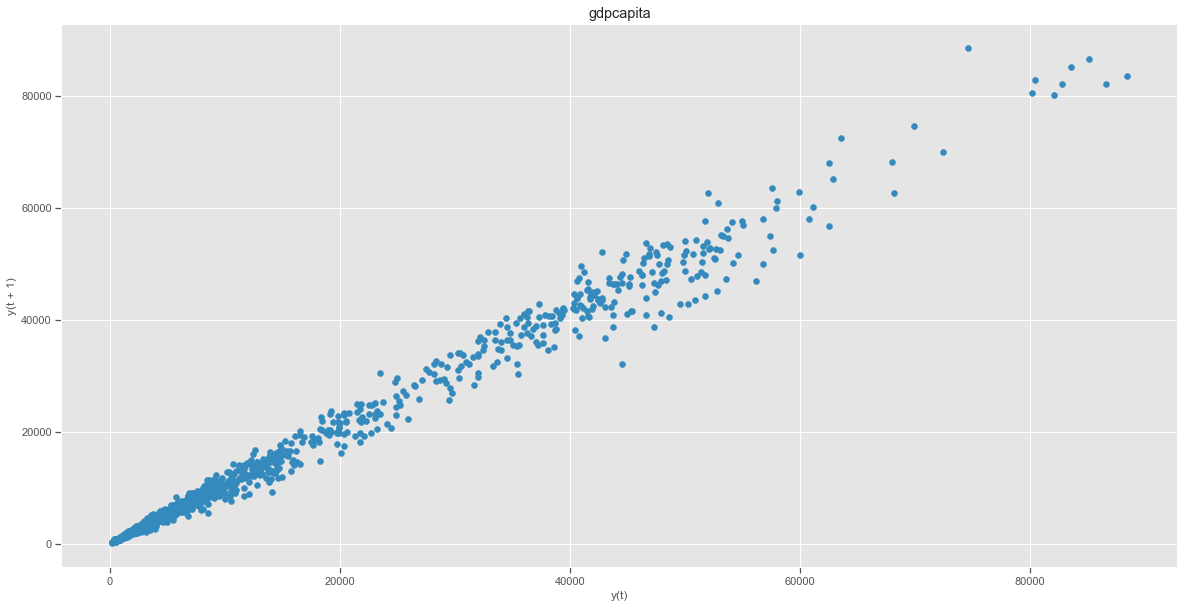

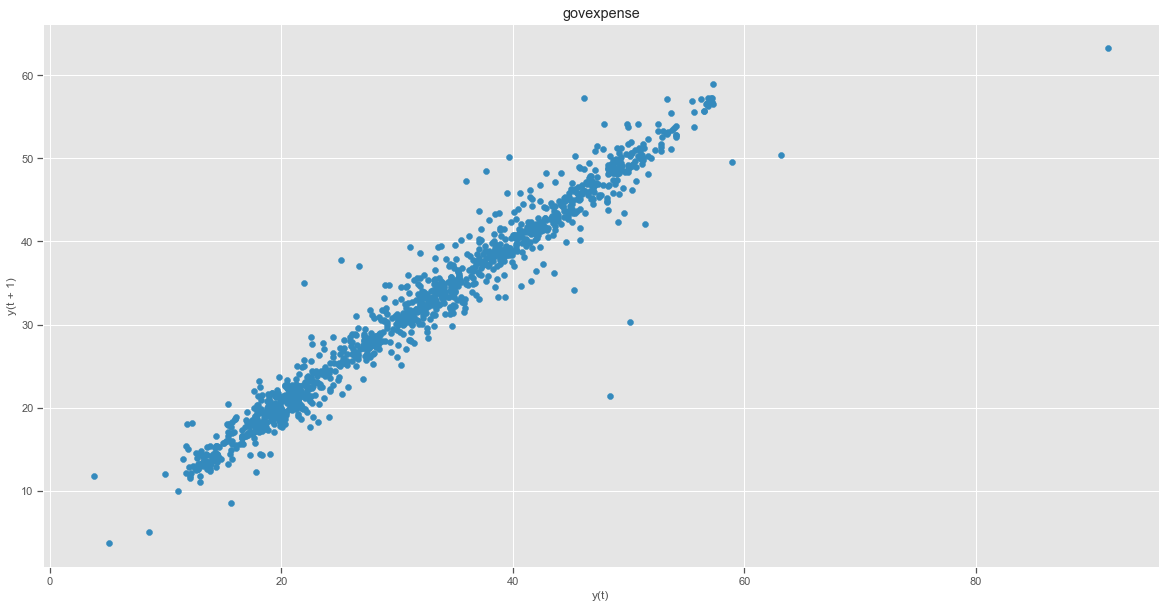

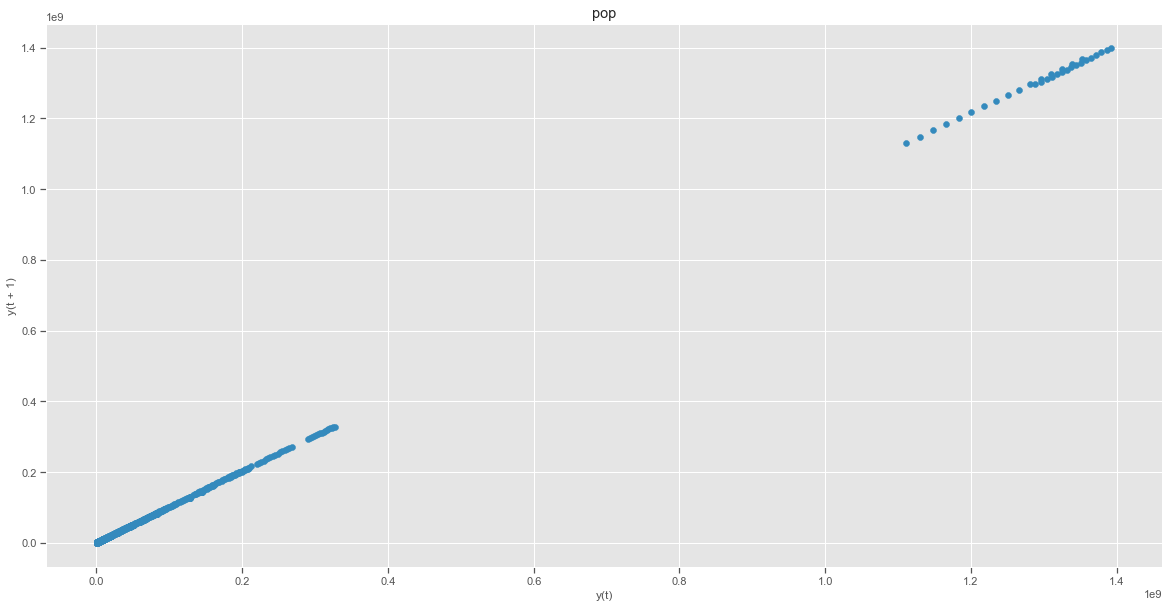

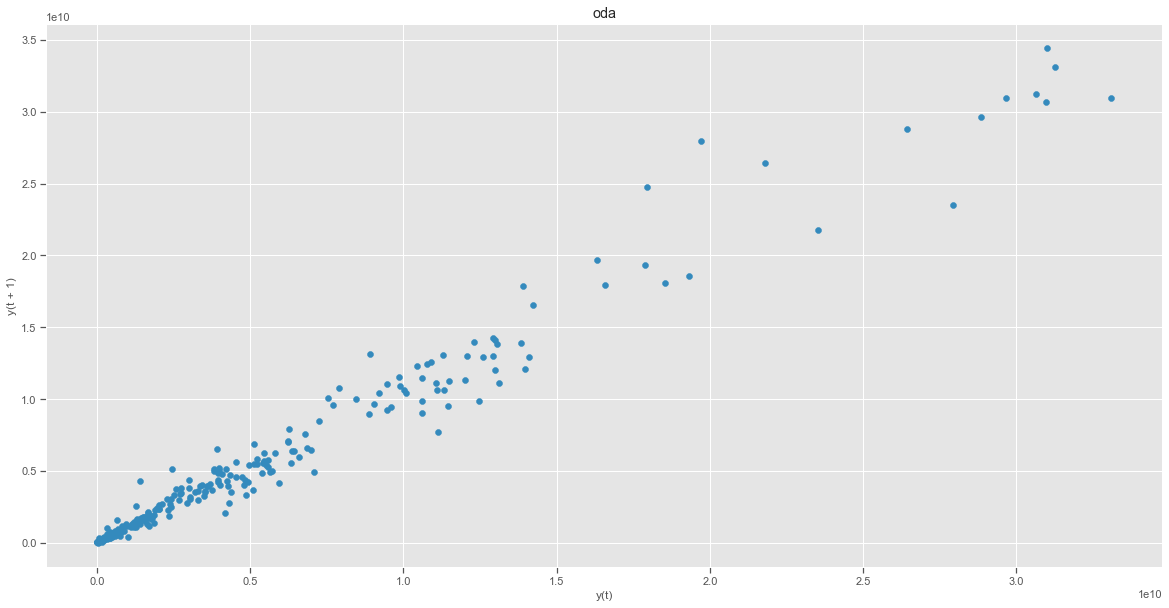

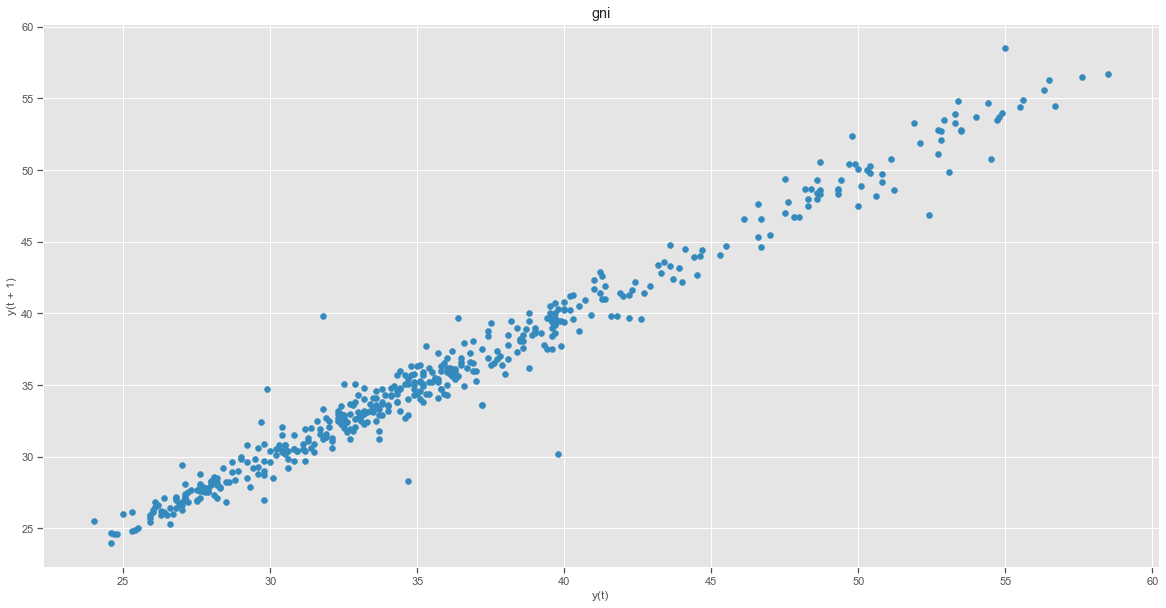

In [10]:
for i in range(len(year_vary)):
    pd.plotting.lag_plot(long[year_vary[i]])
    plt.title(year_vary[i])
    plt.show()


  